In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.plotting import figure, gridplot
from bokeh.models import LinearAxis, Range1d
output_notebook()

Loading BokehJS ...

### Data
构造`y=3x+5`的数据点`(x,y)`并加入噪声。

In [2]:
n_data = 20
x_train = np.array([np.random.rand(n_data)*10])
y_train = 3*x_train+ 5 + np.random.rand(n_data)*3-1.5
x_train = x_train.reshape(n_data, -1)
y_train = y_train.reshape(n_data, -1)
print(x_train.shape, y_train.shape)

(20, 1) (20, 1)


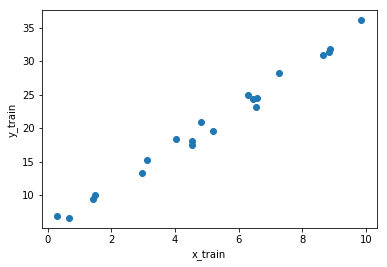

In [3]:
plt.figure() 
#画图散点图
plt.scatter(x_train,y_train)
plt.xlabel('x_train')
#x轴名称
plt.ylabel('y_train')
#y轴名称
#显示图片
plt.show()

### Model
构造线性回归模型

In [4]:
class LinearRegression(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = nn.Linear(dim_in, dim_out)
    def forward(self, x):
        return self.linear(x)

In [5]:
dim_in = 1
dim_out = 1
lrate = 0.001
epochs = 600

model = LinearRegression(dim_in, dim_out).double()
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=lrate)

inputs = torch.from_numpy(x_train).double()
targets = torch.from_numpy(y_train).double()

注意：每次反向传播的时候都需要将参数的梯度归零。  
`optim.step()`则在每个`Variable`的`grad`都被计算出来后，更新每个`Variable`的数值

In [6]:
result = []
for e in range(epochs):
    optim.zero_grad()
    outputs = model(inputs)
    loss = criterion(targets, outputs)
    loss.backward()
    optim.step()
    result.append(float(loss))
    
fig = figure()
fig.line(range(len(result)), result)
show(fig)

### Result
检验预测结果

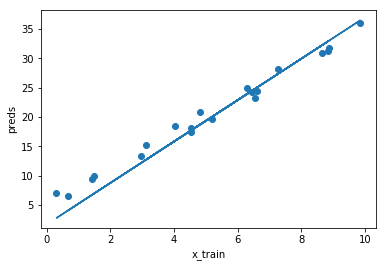

In [7]:
preds = model(inputs).data.numpy()
plt.figure() 
plt.scatter(x_train, y_train)
plt.plot(x_train, preds)
plt.xlabel('x_train')
plt.ylabel('preds')
plt.show()